<a href="https://colab.research.google.com/github/AdriaCoding/ADM2/blob/master/project2_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas scikit-learn statsmodels scipy pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

lynx_hare_url = "https://gist.github.com/michaelosthege/27315631c1aedbe55f5affbccabef1ca/raw/d4c59759a36a8ad9b821bff24733fb73b7424328/Leigh1968_harelynx.csv"
data = pd.read_csv(lynx_hare_url)


In [ ]:
data.head()

,year,hare,lynx
0,1847,21000,49000
1,1848,12000,21000
2,1849,24000,9000
3,1850,50000,7000
4,1851,80000,5000


In [ ]:
data['year'] = pd.to_datetime(data['year'], format="%Y")
data['hare'] /= 1000
data['lynx'] /= 1000


In [ ]:
data = data.set_index("year")
data.index.freq = data.index.inferred_freq

In [ ]:
import datetime

# clean data set
data['hare'][datetime.datetime(1862,1,1)] = 50



In [ ]:
# training split
train_end = datetime.date(1866,1,1)
train_data = data[:train_end]
test_data = data[train_end + datetime.timedelta(days = 1):]

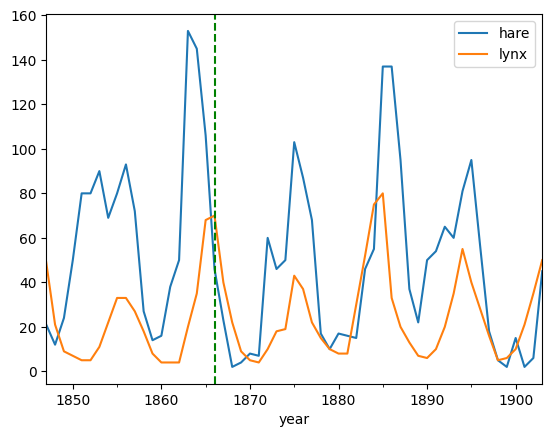

In [ ]:
import matplotlib
plot = data.plot()
matplotlib.pyplot.axvline(train_end, linestyle='--', c='green', label='training split')

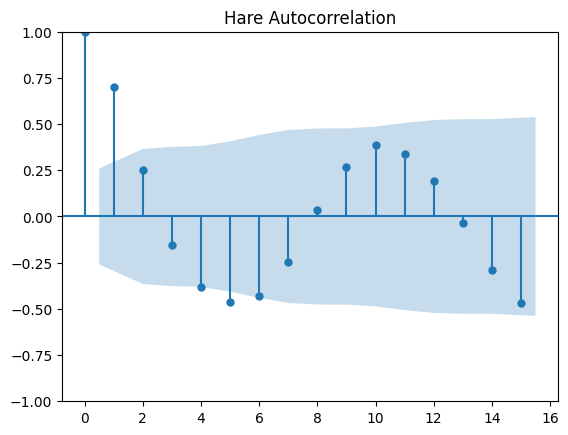

In [ ]:
import statsmodels.api as sm

_plot = sm.graphics.tsa.plot_acf(data['hare'].values.squeeze(), lags=15, title="Hare Autocorrelation")


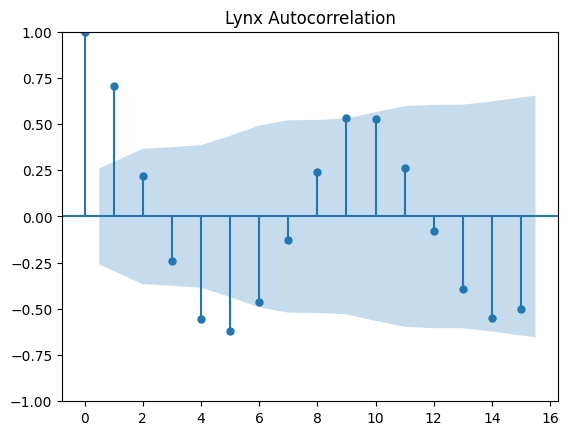

In [ ]:
_plot = sm.graphics.tsa.plot_acf(data['lynx'].values.squeeze(), lags=15, title="Lynx Autocorrelation")


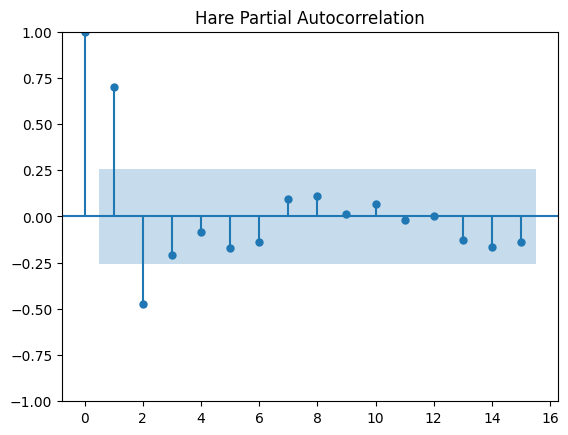

In [ ]:
_plot = sm.graphics.tsa.plot_pacf(data['hare'], lags=15, title="Hare Partial Autocorrelation")

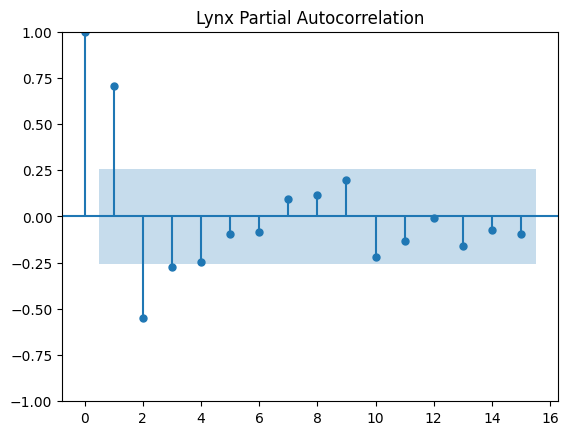

In [ ]:
_plot = sm.graphics.tsa.plot_pacf(data['lynx'], lags=15, title= "Lynx Partial Autocorrelation")

# Training models

## AR
Fitting an AR model without seasonal component

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['lynx'], order = (9, 0, 1)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   lynx   No. Observations:                   20
Model:                 ARIMA(9, 0, 1)   Log Likelihood                 -65.210
Date:                Thu, 30 May 2024   AIC                            154.419
Time:                        08:16:16   BIC                            166.368
Sample:                    01-01-1847   HQIC                           156.752
                         - 01-01-1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5183      9.587      2.766      0.006       7.728      45.308
ar.L1          1.6914      0.673      2.515      0.012       0.373       3.010
ar.L2         -0.2106      1.352     -0.156      0.876      -2.861       2.440
ar.L3         -1.6248      1.174     -1.384      0.166      -3.926       0.676
ar.L4          1.4934      2.069      0.722      0.470      -2.561       5.548
ar.L5         -0.0683      2.536     -0.027      0.979      -5.039       4.902
ar.L6         -1.3035      1.988     -0.656      0.512      -5.199       2.592
ar.L7          0.8484      1.087      0.780      0.435      -1.282       2.979
ar.L8          0.4942      1.326      0.373      0.709      -2.104       3.092
ar.L9         -0.5720      0.582     -0.983      0.325      -1.712       0.568
ma.L1         -0.9813      8.943     -0.110      0.913     -18.509      16.546
sigma2        16.8850    146.286      0.115      0.908    -269.831     303.601
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.12   Prob(JB):                         0.77
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model2 = ARIMA(train_data['lynx'], order = (5, 0, 0)).fit()
model2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   lynx   No. Observations:                   20
Model:                 ARIMA(5, 0, 0)   Log Likelihood                 -70.261
Date:                Thu, 30 May 2024   AIC                            154.522
Time:                        08:16:16   BIC                            161.492
Sample:                    01-01-1847   HQIC                           155.882
                         - 01-01-1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0451      5.978      3.688      0.000      10.328      33.762
ar.L1          1.3871      0.367      3.783      0.000       0.669       2.106
ar.L2         -0.6598      0.608     -1.085      0.278      -1.851       0.532
ar.L3         -0.7480      0.446     -1.676      0.094      -1.623       0.127
ar.L4          0.9094      0.986      0.923      0.356      -1.023       2.842
ar.L5         -0.5407      0.755     -0.717      0.474      -2.020       0.938
sigma2        48.8445     31.522      1.550      0.121     -12.938     110.626
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.36   Prob(JB):                         0.11
Heteroskedasticity (H):               1.81   Skew:                             1.06
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model3 = ARIMA(train_data['lynx'], order = (3, 0, 0)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   lynx   No. Observations:                   20
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 -71.381
Date:                Thu, 30 May 2024   AIC                            152.763
Time:                        08:16:17   BIC                            157.741
Sample:                    01-01-1847   HQIC                           153.734
                         - 01-01-1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8593      6.949      3.434      0.001      10.241      37.478
ar.L1          1.2166      0.295      4.121      0.000       0.638       1.795
ar.L2         -0.3408      0.502     -0.679      0.497      -1.325       0.643
ar.L3         -0.3409      0.312     -1.093      0.275      -0.952       0.271
sigma2        60.1231     30.758      1.955      0.051      -0.162     120.408
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 6.37
Prob(Q):                              0.69   Prob(JB):                         0.04
Heteroskedasticity (H):               1.52   Skew:                             1.21
Prob(H) (two-sided):                  0.59   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction_start_date = test_data.index[0]
prediction_end_date= test_data.index[-1]
def obtain_predictions(model):
  return model.predict(prediction_start_date, prediction_end_date)

def plot_predictions(predictions, name='lynx predicted'):
  pred_actual = test_data.copy()
  pred_actual[name] = predictions
  pred_actual.plot()

def obtain_predictions_one_year(model):
  m = model
  def forecast_advance(x):
    nonlocal m
    r = m.forecast(1)
    m = m.append([x])
    return r[0]
  return test_data['lynx'].apply(forecast_advance)

from sklearn import metrics

def mse_predictions(predictions, ds='lynx'):
  return metrics.mean_squared_error(test_data[ds], predictions)

In [ ]:
predictions1_yearly = obtain_predictions_one_year(model)
predictions1_all = obtain_predictions(model)
predictions2_yearly = obtain_predictions_one_year(model2)
predictions2_all = obtain_predictions(model2)
predictions3_yearly = obtain_predictions_one_year(model3)
predictions3_all = obtain_predictions(model3)


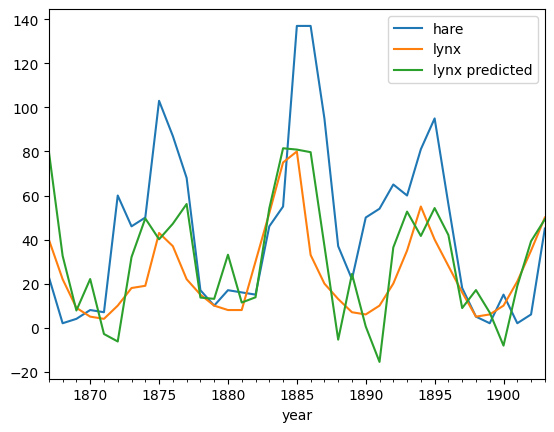

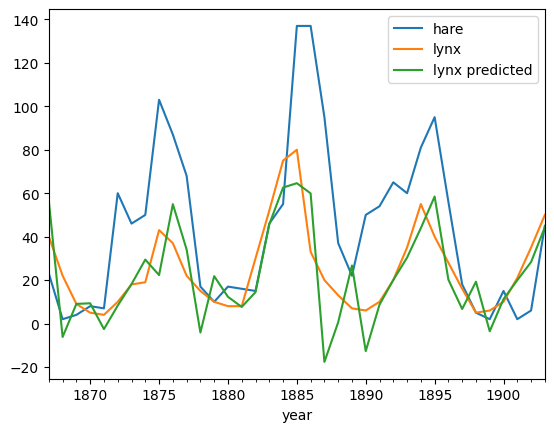

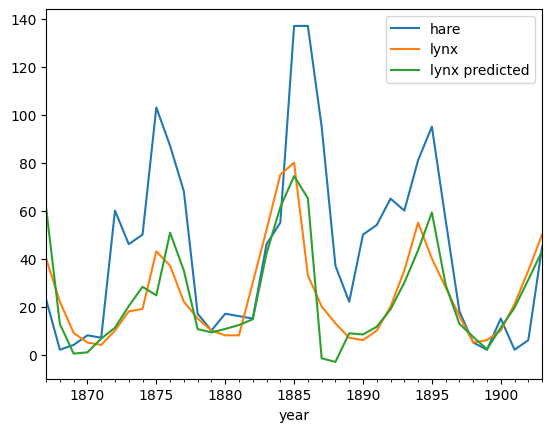

In [ ]:
plot_predictions(predictions1_yearly)
plot_predictions(predictions2_yearly)
plot_predictions(predictions3_yearly)


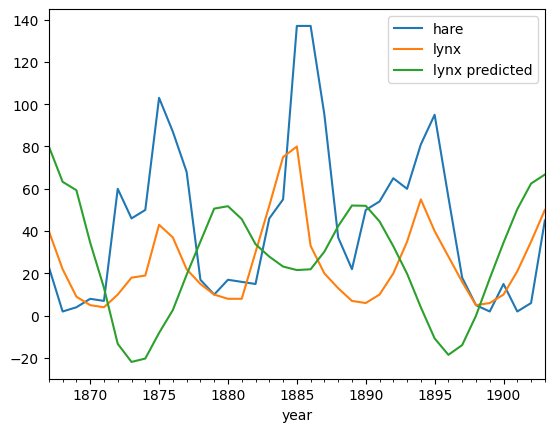

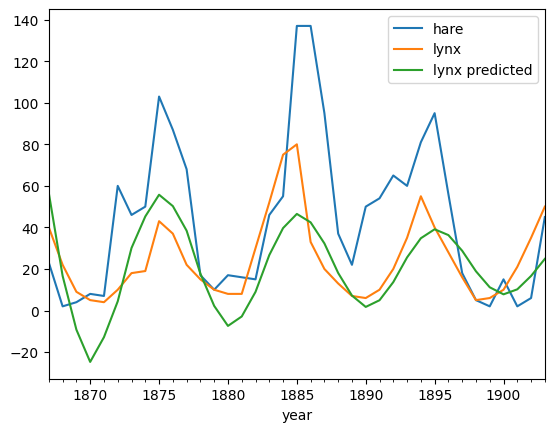

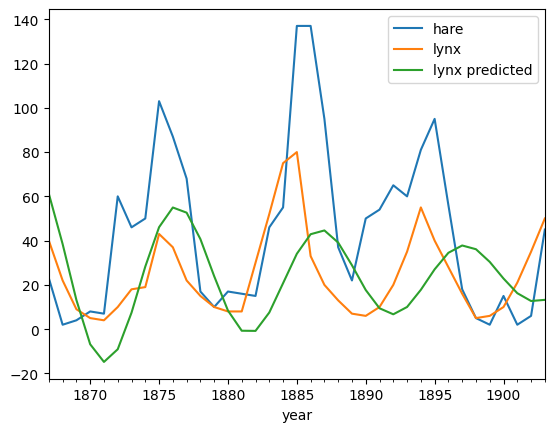

In [ ]:
plot_predictions(predictions1_all)
plot_predictions(predictions2_all)
plot_predictions(predictions3_all)

# Seasonal ARIMA



In [ ]:
seasonal_model = ARIMA(train_data['lynx'], order = (3, 0, 0), seasonal_order=(1,0,1,9)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
seasonal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              lynx   No. Observations:                   20
Model:             ARIMA(3, 0, 0)x(1, 0, [1], 9)   Log Likelihood                 -71.020
Date:                           Thu, 30 May 2024   AIC                            156.040
Time:                                   08:16:22   BIC                            163.010
Sample:                               01-01-1847   HQIC                           157.400
                                    - 01-01-1866                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0341      8.934      2.578      0.010       5.524      40.545
ar.L1          1.2367      0.278      4.446      0.000       0.692       1.782
ar.L2         -0.4600      0.729     -0.631      0.528      -1.889       0.969
ar.L3         -0.3085      0.305     -1.013      0.311      -0.906       0.289
ar.S.L9        0.4577      3.122      0.147      0.883      -5.662       6.577
ma.S.L9       -0.9997   4307.725     -0.000      1.000   -8443.985    8441.986
sigma2        44.4760   1.91e+05      0.000      1.000   -3.75e+05    3.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 4.37
Prob(Q):                              0.41   Prob(JB):                         0.11
Heteroskedasticity (H):               1.61   Skew:                             1.05
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

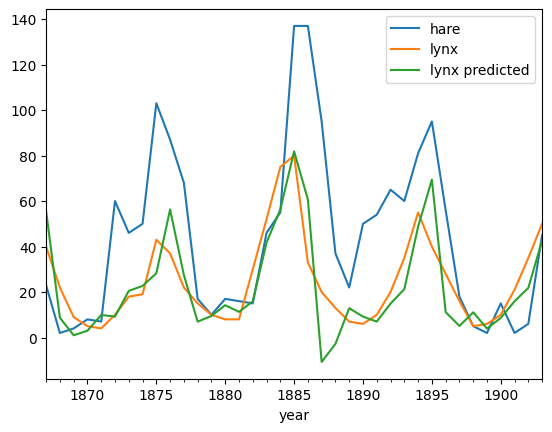

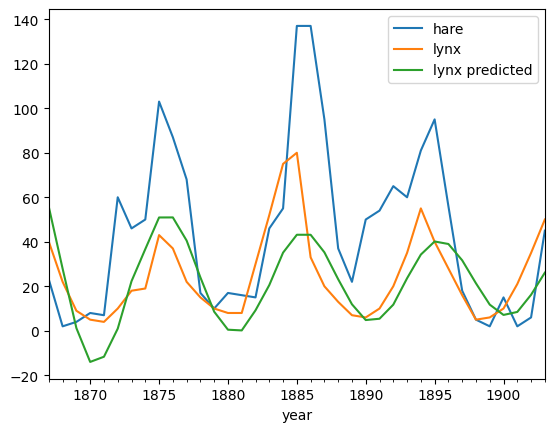

In [ ]:

predictions_seasonal_yearly = obtain_predictions_one_year(seasonal_model)
predictions_seasonal_all = obtain_predictions(seasonal_model)
plot_predictions(predictions_seasonal_yearly)
plot_predictions(predictions_seasonal_all)

# Adding Exogynous Variables - Predicting Hares based on Lynx

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
hare_model1 = ARIMA(train_data['hare'], order = (15, 0, 1), exog=train_data['lynx']).fit()
hare_model2 = ARIMA(train_data['hare'], order = (5, 0, 1), exog=train_data['lynx']).fit()
hare_model3 = ARIMA(train_data['hare'], order = (3, 0, 1), exog=train_data['lynx']).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
hare_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   hare   No. Observations:                   20
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -89.207
Date:                Thu, 30 May 2024   AIC                            192.415
Time:                        08:16:27   BIC                            199.385
Sample:                    01-01-1847   HQIC                           193.775
                         - 01-01-1866                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.7095     22.330      2.764      0.006      17.944     105.475
lynx           0.0239      1.259      0.019      0.985      -2.443       2.491
ar.L1          1.2901      0.489      2.638      0.008       0.332       2.248
ar.L2         -0.6604      0.880     -0.751      0.453      -2.385       1.064
ar.L3         -0.1724      0.575     -0.300      0.764      -1.299       0.954
ma.L1         -0.9976     30.168     -0.033      0.974     -60.126      58.131
sigma2       322.4307   9657.659      0.033      0.973   -1.86e+04    1.93e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.09
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.03   Skew:                             1.52
Prob(H) (two-sided):                  0.09   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

def obtain_exog_predictions(model, exog_model):
  exog_predictions_data = exog_model.predict(prediction_start_date, prediction_end_date)
  return model.predict(prediction_start_date, prediction_end_date, exog=exog_predictions_data)

def obtain_exog_predictions_one_year(model, exog_model):
  m = model
  em = exog_model
  def forecast_advance(x):
    nonlocal m
    nonlocal em
    r = m.forecast(1, exog=em.forecast(1))
    m = m.append([x['hare']], exog=[x['lynx']])
    em.append([x['lynx']])
    return r[0]
  return test_data.apply(forecast_advance, axis=1)


In [ ]:
hare_predictions1_yearly = obtain_exog_predictions_one_year(hare_model1, seasonal_model)
hare_predictions1_all = obtain_exog_predictions(hare_model1, seasonal_model)
hare_predictions2_yearly = obtain_exog_predictions_one_year(hare_model2, seasonal_model)
hare_predictions2_all = obtain_exog_predictions(hare_model2, seasonal_model)
hare_predictions3_yearly = obtain_exog_predictions_one_year(hare_model3, seasonal_model)
hare_predictions3_all = obtain_exog_predictions(hare_model3, seasonal_model)

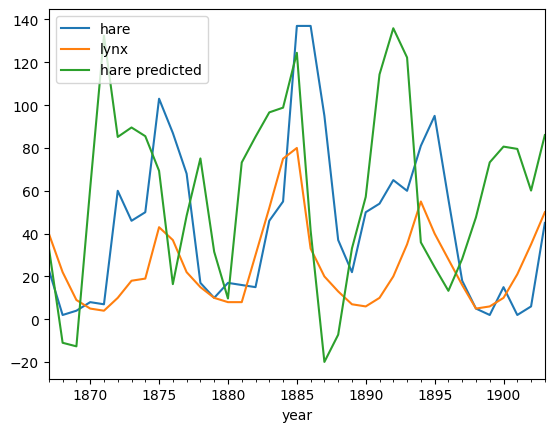

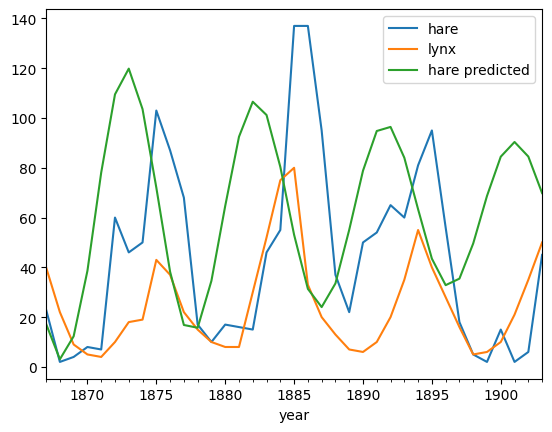

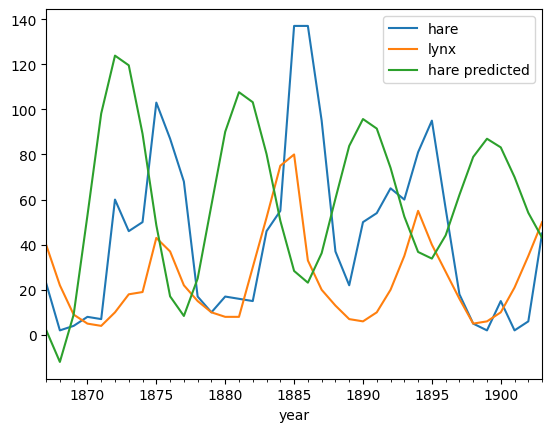

In [ ]:
plot_predictions(hare_predictions1_all, 'hare predicted')
plot_predictions(hare_predictions2_all, 'hare predicted')
plot_predictions(hare_predictions3_all, 'hare predicted')

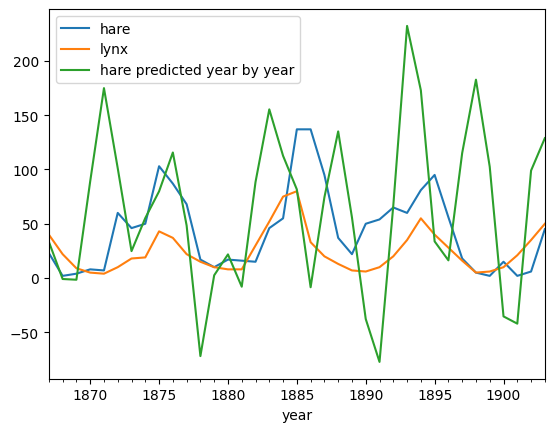

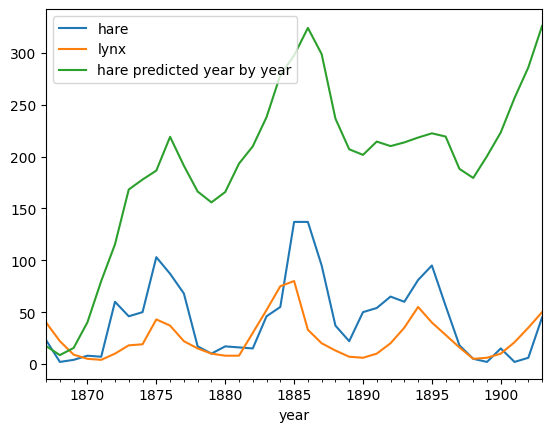

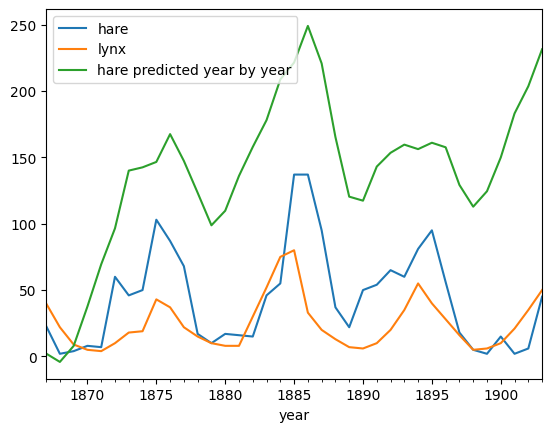

In [ ]:
plot_predictions(hare_predictions1_yearly, 'hare predicted year by year')
plot_predictions(hare_predictions2_yearly, 'hare predicted year by year')
plot_predictions(hare_predictions3_yearly, 'hare predicted year by year')

## Seasonal

In [ ]:
hare_seasonal_model = ARIMA(train_data['hare'], order = (3, 0, 0), seasonal_order=(1,0,1,9), exog=train_data['lynx'] ).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:

hare_predictions_seasonal_yearly = obtain_exog_predictions_one_year(hare_seasonal_model, seasonal_model)
hare_predictions_seasonal_all = obtain_exog_predictions(hare_seasonal_model, seasonal_model)

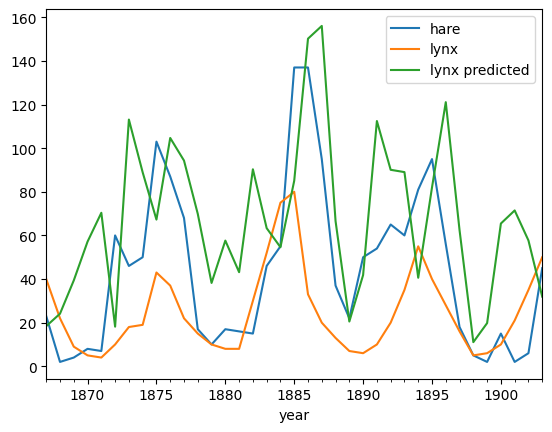

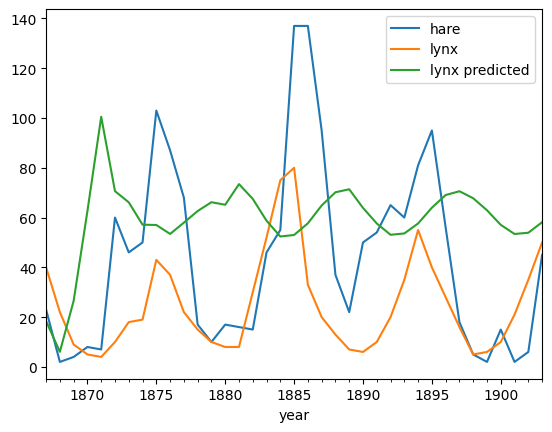

In [ ]:
plot_predictions(hare_predictions_seasonal_yearly)
plot_predictions(hare_predictions_seasonal_all)

In [ ]:
# predictions1_all
# predictions2_all
# predictions3_all
# predictions_seasonal_all
# hare_predictions_seasonal_all

# predictions1_yearly
# predictions2_yearly
# predictions3_yearly
# predictions_seasonal_yearly

print("predictions1_yearly mse: %E" % mse_predictions(predictions1_yearly))
print("predictions2_yearly mse: %E" % mse_predictions(predictions2_yearly))
print("predictions3_yearly mse: %E" % mse_predictions(predictions3_yearly))
print("predictions_seasonal_yearly mse: %E" % mse_predictions(predictions_seasonal_yearly))

print("predictions_seasonal_all mse: %E" % mse_predictions(predictions_seasonal_all))

predictions1_yearly mse: 3.028744E+02
predictions2_yearly mse: 1.993603E+02
predictions3_yearly mse: 1.191498E+02
predictions_seasonal_yearly mse: 1.558170E+02
predictions_seasonal_all mse: 2.540734E+02


In [ ]:

print("hare_predictions1_yearly mse: %E" % mse_predictions(hare_predictions1_yearly, 'hare'))
print("hare_predictions2_yearly mse: %E" % mse_predictions(hare_predictions2_yearly, 'hare'))
print("hare_predictions3_yearly mse: %E" % mse_predictions(hare_predictions3_yearly, 'hare'))
print("hare_predictions_seasonal_yearly mse: %E" % mse_predictions(hare_predictions_seasonal_yearly, 'hare'))
print("hare_predictions_seasonal_all mse: %E" % mse_predictions(hare_predictions_seasonal_all, 'hare'))


hare_predictions1_yearly mse: 6.572801E+03
hare_predictions2_yearly mse: 2.698138E+04
hare_predictions3_yearly mse: 1.129889E+04
hare_predictions_seasonal_yearly mse: 1.654196E+03
hare_predictions_seasonal_all mse: 1.814070E+03


In [ ]:

simple_hare_model1 = ARIMA(train_data['hare'], order = (15, 0, 1),).fit()
simple_hare_model2 = ARIMA(train_data['hare'], order = (5, 0, 1), ).fit()
simple_hare_model3 = ARIMA(train_data['hare'], order = (3, 0, 1), ).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
simple_hare_predictions1_yearly = obtain_predictions_one_year(simple_hare_model1)
simple_hare_predictions1_all = obtain_predictions(simple_hare_model1)
simple_hare_predictions2_yearly = obtain_predictions_one_year(simple_hare_model2)
simple_hare_predictions2_all = obtain_predictions(simple_hare_model2)
simple_hare_predictions3_yearly = obtain_predictions_one_year(simple_hare_model3)
simple_hare_predictions3_all = obtain_predictions(simple_hare_model3)

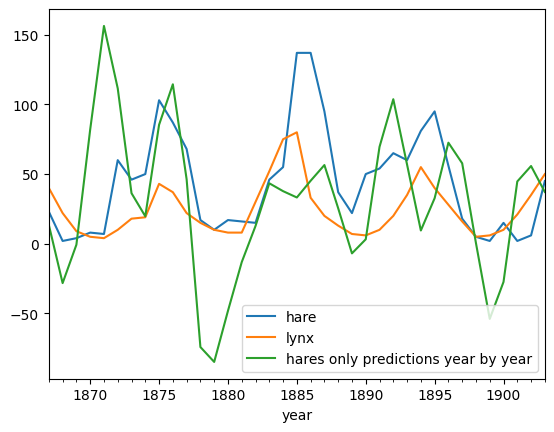

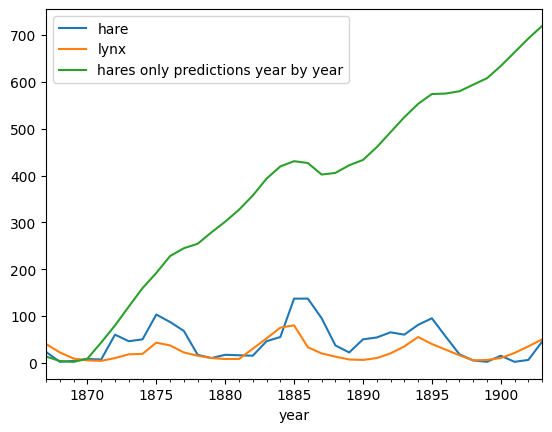

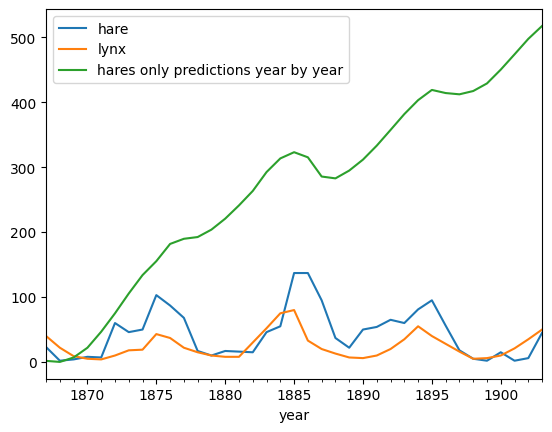

In [ ]:
plot_predictions(simple_hare_predictions1_yearly, 'hares only predictions year by year')
plot_predictions(simple_hare_predictions2_yearly, 'hares only predictions year by year')
plot_predictions(simple_hare_predictions3_yearly, 'hares only predictions year by year')

In [ ]:
print("hare_predictions1_yearly mse: %E" % mse_predictions(simple_hare_predictions1_yearly, 'hare'))
print("hare_predictions2_yearly mse: %E" % mse_predictions(simple_hare_predictions2_yearly, 'hare'))
print("hare_predictions3_yearly mse: %E" % mse_predictions(simple_hare_predictions3_yearly, 'hare'))

hare_predictions1_yearly mse: 2.769079E+03
hare_predictions2_yearly mse: 1.492877E+05
hare_predictions3_yearly mse: 7.251365E+04
